In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt 
import pickle 
from IPython.core.debugger import set_trace

import torch 
import argparse
from scipy.optimize import minimize
from scipy.spatial.distance import squareform, pdist
from models import CustomAlexNet
from utils.eval import perform_rsa_cnn
from joblib import Parallel, delayed
from sklearn.manifold import MDS
import time
from utils.plotting import plot_MDS_embeddings_2D
%matplotlib inline

In [2]:
# instantiate model with small weight init
nnet = CustomAlexNet(pretrained=False)
# _ = nnet.apply(rich_init)

layerstoplot = [0,3,6,8,10]
for i in layerstoplot:
    w = nnet.features[i].weight.cpu().detach().numpy()
    print(f'layer{i}, norm: {np.linalg.norm(w.flatten())}') 
w = nnet.fc1.weight.cpu().detach().numpy()
print(f'layer fc1, norm: {np.linalg.norm(w.flatten())}') 

w = nnet.o.weight.cpu().detach().numpy()
print(f'layer o, norm: {np.linalg.norm(w.flatten())}') 

layer0, norm: 4.60213041305542
layer3, norm: 7.992994785308838
layer6, norm: 11.316193580627441
layer8, norm: 9.237665176391602
layer10, norm: 9.242709159851074
layer fc1, norm: 13.061418533325195
layer o, norm: 0.5714670419692993


In [5]:
for o in results['outputs']:
    print(o.shape)

(50, 64, 23, 23)
(50, 64, 23, 23)
(50, 64, 11, 11)
(50, 192, 11, 11)
(50, 192, 11, 11)
(50, 192, 5, 5)
(50, 384, 5, 5)
(50, 384, 5, 5)
(50, 256, 5, 5)
(50, 256, 5, 5)
(50, 256, 5, 5)
(50, 256, 5, 5)
(50, 512)
(50, 1)


In [3]:
# import data 
n_runs = 30
datadir = '../../Data/Simulations/cnn/alexnet_fromscratch_lazy/run_0/'

# load model 
with open(datadir+'model.pkl','rb') as f:
    model = pickle.load(f)
# load data 
with open(datadir+'results.pkl','rb') as f:
    results = pickle.load(f)

In [4]:
layerstoplot = [0,3,6,8,10]
for i in layerstoplot:
    w = model.features[i].weight.cpu().detach().numpy()
    print(f'layer{i}, norm: {np.linalg.norm(w.flatten())}') 
w = model.fc1.weight.cpu().detach().numpy()
print(f'layer fc1, norm: {np.linalg.norm(w.flatten())}') 

w = model.o.weight.cpu().detach().numpy()
print(f'layer o, norm: {np.linalg.norm(w.flatten())}')

layer0, norm: 15.291318893432617
layer3, norm: 56.06097412109375
layer6, norm: 81.8889389038086
layer8, norm: 94.59174346923828
layer10, norm: 77.19356536865234
layer fc1, norm: 39.27591323852539
layer o, norm: 0.03244427219033241


## visualise layer outputs

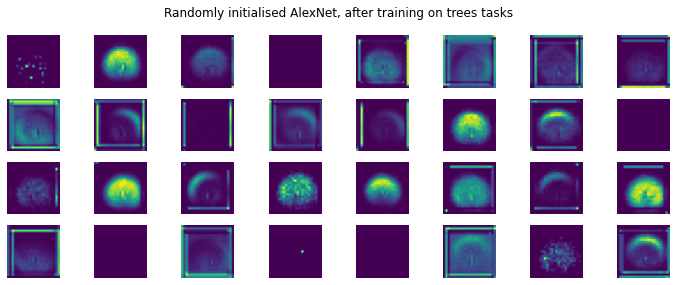

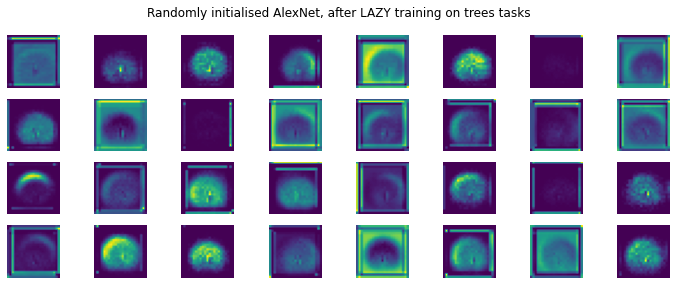

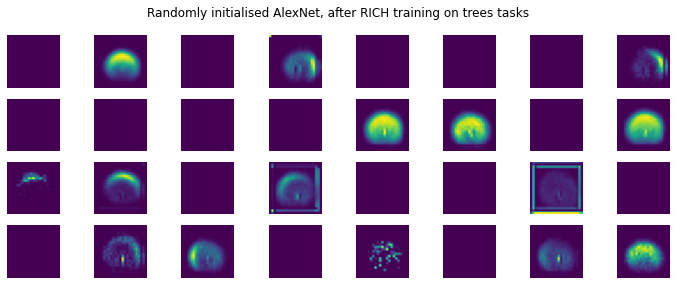

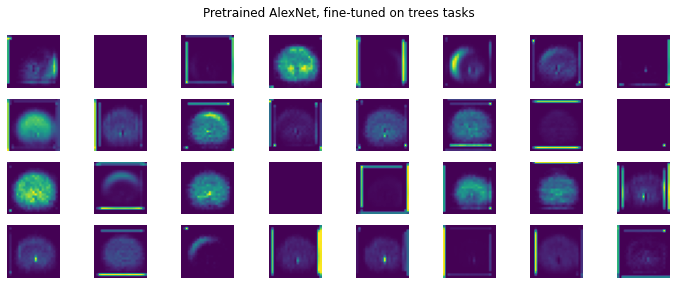

In [5]:
# visualise conv layer activations
# # Fromscratch, not trained on task
# model = CustomAlexNet(pretrained=False)
# parser = argparse.ArgumentParser(description='CNN Simulations')
# args = parser.parse_args(args=[])
# args.device='cuda'
# outputs,rdms = perform_rsa_cnn(args,model)
# f,axs = plt.subplots(4,8,figsize=(10,4))
# axs = axs.ravel()
# for ii,ax in enumerate(axs):     
#     w = outputs[1][21,ii,:,:]
#     # w /= np.max(w)    
#     _=ax.imshow(w)
#     ax.set_axis_off()
# plt.suptitle('Randomly initialised AlexNet, before training on trees tasks')
# plt.tight_layout()


# Fromscratch, trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch/'+'results.pkl','rb') as f:
    results = pickle.load(f)
outputs = results['outputs']
f,axs = plt.subplots(4,8,figsize=(10,4))
axs = axs.ravel()
for ii,ax in enumerate(axs):     
    w = outputs[1][21,ii,:,:]
    # w /= np.max(w)    
    _=ax.imshow(w)
    ax.set_axis_off()
plt.suptitle('Randomly initialised AlexNet, after training on trees tasks')
plt.tight_layout()


# Fromscratch, lazy, trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch_lazy/run_1/'+'results.pkl','rb') as f:
    results = pickle.load(f)
outputs = results['outputs']
f,axs = plt.subplots(4,8,figsize=(10,4))
axs = axs.ravel()
for ii,ax in enumerate(axs):     
    w = outputs[1][21,ii,:,:]
    # w /= np.max(w)    
    _=ax.imshow(w)
    ax.set_axis_off()
plt.suptitle('Randomly initialised AlexNet, after LAZY training on trees tasks')
plt.tight_layout()


# Fromscratch, rich, trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch_rich/run_1/'+'results.pkl','rb') as f:
    results = pickle.load(f)
outputs = results['outputs']
f,axs = plt.subplots(4,8,figsize=(10,4))
axs = axs.ravel()
for ii,ax in enumerate(axs):     
    w = outputs[1][21,ii,:,:]
    # w /= np.max(w)    
    _=ax.imshow(w)
    ax.set_axis_off()
plt.suptitle('Randomly initialised AlexNet, after RICH training on trees tasks')
plt.tight_layout()


# # Pretrained, not trained on task
# model = CustomAlexNet(pretrained=True)
# parser = argparse.ArgumentParser(description='CNN Simulations')
# args = parser.parse_args(args=[])
# args.device='cuda'
# outputs,rdms = perform_rsa_cnn(args,model)
# f,axs = plt.subplots(4,8,figsize=(10,4))
# axs = axs.ravel()
# for ii,ax in enumerate(axs):     
#     w = outputs[1][21,ii,:,:]
#     # w /= np.max(w)    
#     _=ax.imshow(w)
#     ax.set_axis_off()
# plt.suptitle('Pretrained AlexNet, before training on trees tasks')
# plt.tight_layout()


# Pretrained, fine-tuned on task
with open('../../Data/Simulations/cnn/alexnet_pretrained/'+'results.pkl','rb') as f:
    results = pickle.load(f)

outputs = results['outputs']
f,axs = plt.subplots(4,8,figsize=(10,4))
axs = axs.ravel()
for ii,ax in enumerate(axs):     
    w = outputs[1][21,ii,:,:]
    # w /= np.max(w)    
    _=ax.imshow(w)
    ax.set_axis_off()
plt.suptitle('Pretrained AlexNet, fine-tuned on trees tasks')
plt.tight_layout()


## visualise weights

(64, 3, 11, 11)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(64, 3, 11, 11)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(64, 3, 11, 11)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(64, 3, 11, 11)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(64, 3, 11, 11)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(64, 3, 11, 11)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

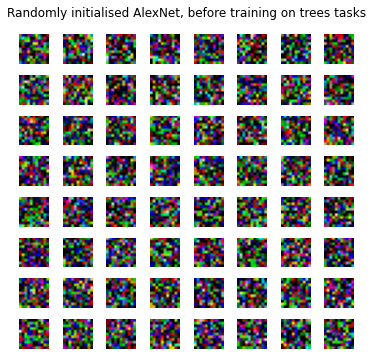

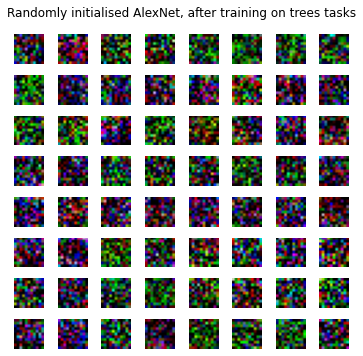

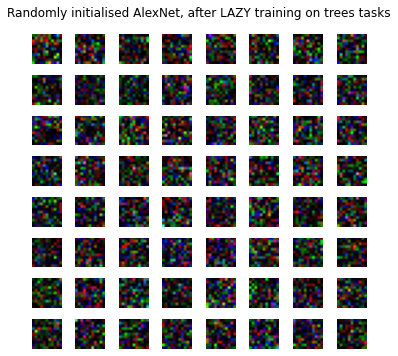

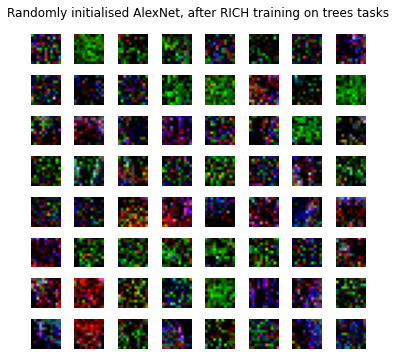

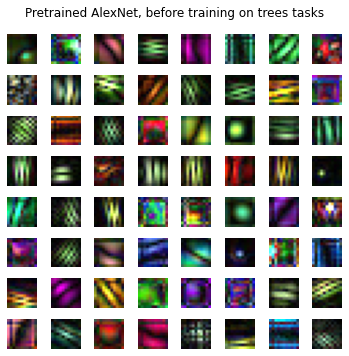

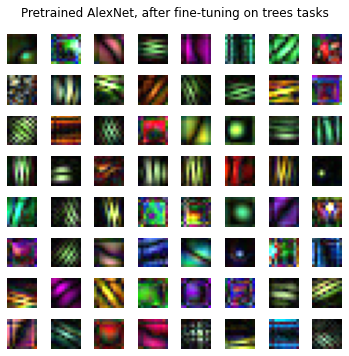

In [8]:
# visualise weights
#Fromscratch, not trained
model = CustomAlexNet(pretrained=False)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[0].weight.cpu().numpy().shape)
    f,axs = plt.subplots(8,8,figsize=(5,5))
    axs = axs.ravel()
    ws = layers[0].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        # w = np.abs(w)
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(w)
        ax.set_axis_off()
plt.suptitle('Randomly initialised AlexNet, before training on trees tasks')
plt.tight_layout()


# Fromscratch, trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch/'+'model.pkl','rb') as f:
    model = pickle.load(f)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[0].weight.cpu().numpy().shape)
    f,axs = plt.subplots(8,8,figsize=(5,5))
    axs = axs.ravel()
    ws = layers[0].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        # w = np.abs(w)
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(w)
        ax.set_axis_off()
plt.suptitle('Randomly initialised AlexNet, after training on trees tasks')
plt.tight_layout()

# Fromscratch, lazy trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch_lazy/run_1/'+'model.pkl','rb') as f:
    model = pickle.load(f)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[0].weight.cpu().numpy().shape)
    f,axs = plt.subplots(8,8,figsize=(5,5))
    axs = axs.ravel()
    ws = layers[0].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        # w = np.abs(w)
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(w)
        ax.set_axis_off()
plt.suptitle('Randomly initialised AlexNet, after LAZY training on trees tasks')
plt.tight_layout()


# Fromscratch, rich trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch_rich/run_1/'+'model.pkl','rb') as f:
    model = pickle.load(f)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[0].weight.cpu().numpy().shape)
    f,axs = plt.subplots(8,8,figsize=(5,5))
    axs = axs.ravel()
    ws = layers[0].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        # w = np.abs(w)
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(w)
        ax.set_axis_off()
plt.suptitle('Randomly initialised AlexNet, after RICH training on trees tasks')
plt.tight_layout()

#pretrained, not trained
model = CustomAlexNet(pretrained=True)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[0].weight.cpu().numpy().shape)
    f,axs = plt.subplots(8,8,figsize=(5,5))
    axs = axs.ravel()
    ws = layers[0].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        # w = np.abs(w)
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(np.abs(w))
        ax.set_axis_off()
plt.suptitle('Pretrained AlexNet, before training on trees tasks')
plt.tight_layout()


# pretrained, trained on task 
with open('../../Data/Simulations/cnn/alexnet_pretrained/'+'model.pkl','rb') as f:
    model = pickle.load(f)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[0].weight.cpu().numpy().shape)
    f,axs = plt.subplots(8,8,figsize=(5,5))
    axs = axs.ravel()
    ws = layers[0].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        # w = np.abs(w)
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(np.abs(w))
        ax.set_axis_off()
plt.suptitle('Pretrained AlexNet, after fine-tuning on trees tasks')
plt.tight_layout()

(192, 64, 5, 5)
(192, 64, 5, 5)
(192, 64, 5, 5)
(192, 64, 5, 5)


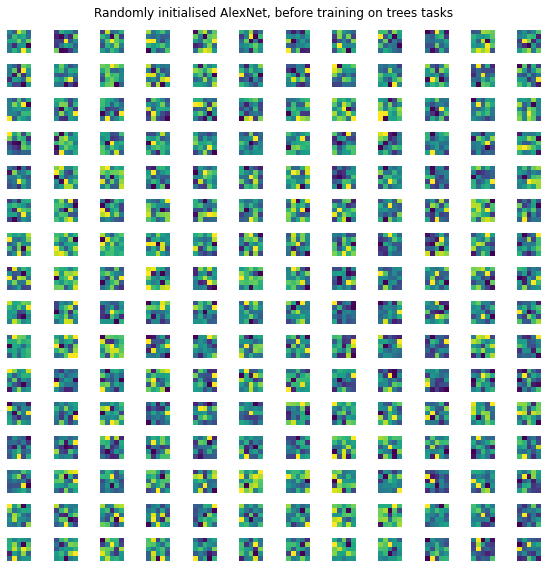

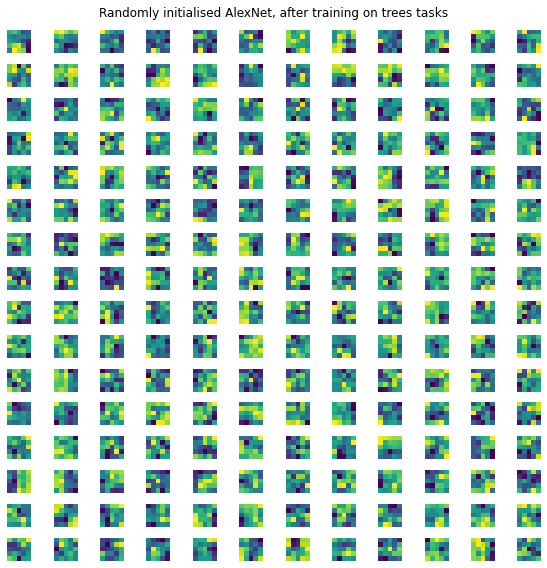

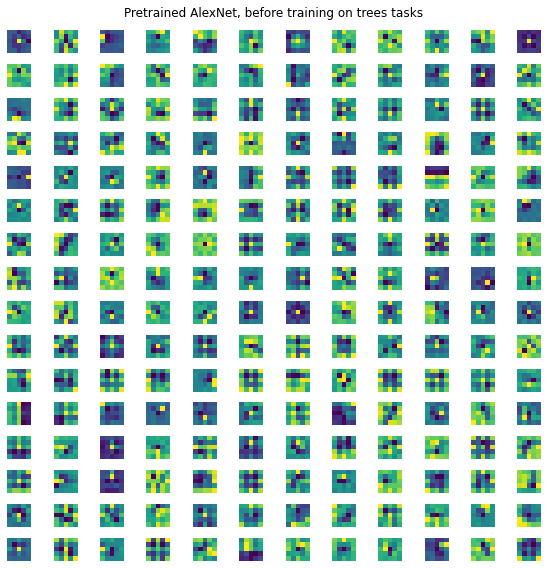

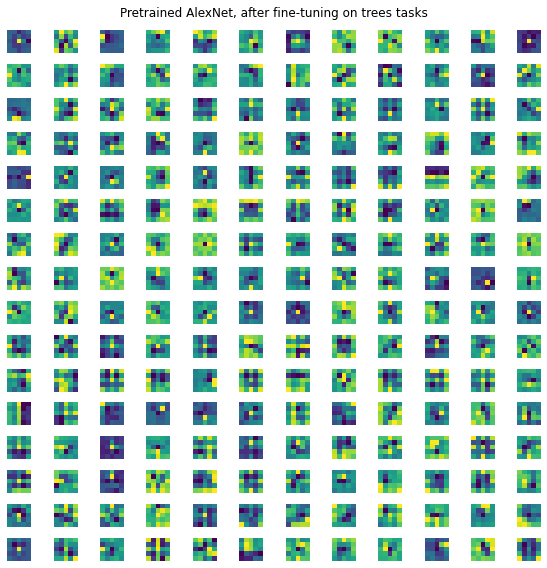

In [9]:
# visualise weights
#Fromscratch, not trained
model = CustomAlexNet(pretrained=False)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[3].weight.cpu().numpy().shape)
    f,axs = plt.subplots(16,12,figsize=(8,8))
    axs = axs.ravel()
    ws = layers[3].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        w = w.mean(-1)
        w = w
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(w)
        ax.set_axis_off()
plt.suptitle('Randomly initialised AlexNet, before training on trees tasks')
plt.tight_layout()


# Fromscratch, trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch/'+'model.pkl','rb') as f:
    model = pickle.load(f)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[3].weight.cpu().numpy().shape)
    f,axs = plt.subplots(16,12,figsize=(8,8))
    axs = axs.ravel()
    ws = layers[3].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        w = w.mean(-1)
        w = w
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(w)
        ax.set_axis_off()
plt.suptitle('Randomly initialised AlexNet, after training on trees tasks')
plt.tight_layout()

#pretrained, not trained
model = CustomAlexNet(pretrained=True)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[3].weight.cpu().numpy().shape)
    f,axs = plt.subplots(16,12,figsize=(8,8))
    axs = axs.ravel()
    ws = layers[3].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        w = w.mean(-1)
        w = w
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(w)
        ax.set_axis_off()
plt.suptitle('Pretrained AlexNet, before training on trees tasks')
plt.tight_layout()


# pretrained, trained on task 
with open('../../Data/Simulations/cnn/alexnet_pretrained/'+'model.pkl','rb') as f:
    model = pickle.load(f)
with torch.no_grad():
    layers =model.get_layers()
    print(layers[3].weight.cpu().numpy().shape)
    f,axs = plt.subplots(16,12,figsize=(8,8))
    axs = axs.ravel()
    ws = layers[3].weight.cpu().numpy()
    for i,ax in enumerate(axs):
        w = ws[i,:,:,:].transpose(1,2,0)
        w = w.mean(-1)
        w = w
        w /=np.max(w)
        # print(f'min: {np.min(w)} max: {np.max(w)}')
        ax.imshow(w)
        ax.set_axis_off()
plt.suptitle('Pretrained AlexNet, after fine-tuning on trees tasks')
plt.tight_layout()

## visualise RDMs

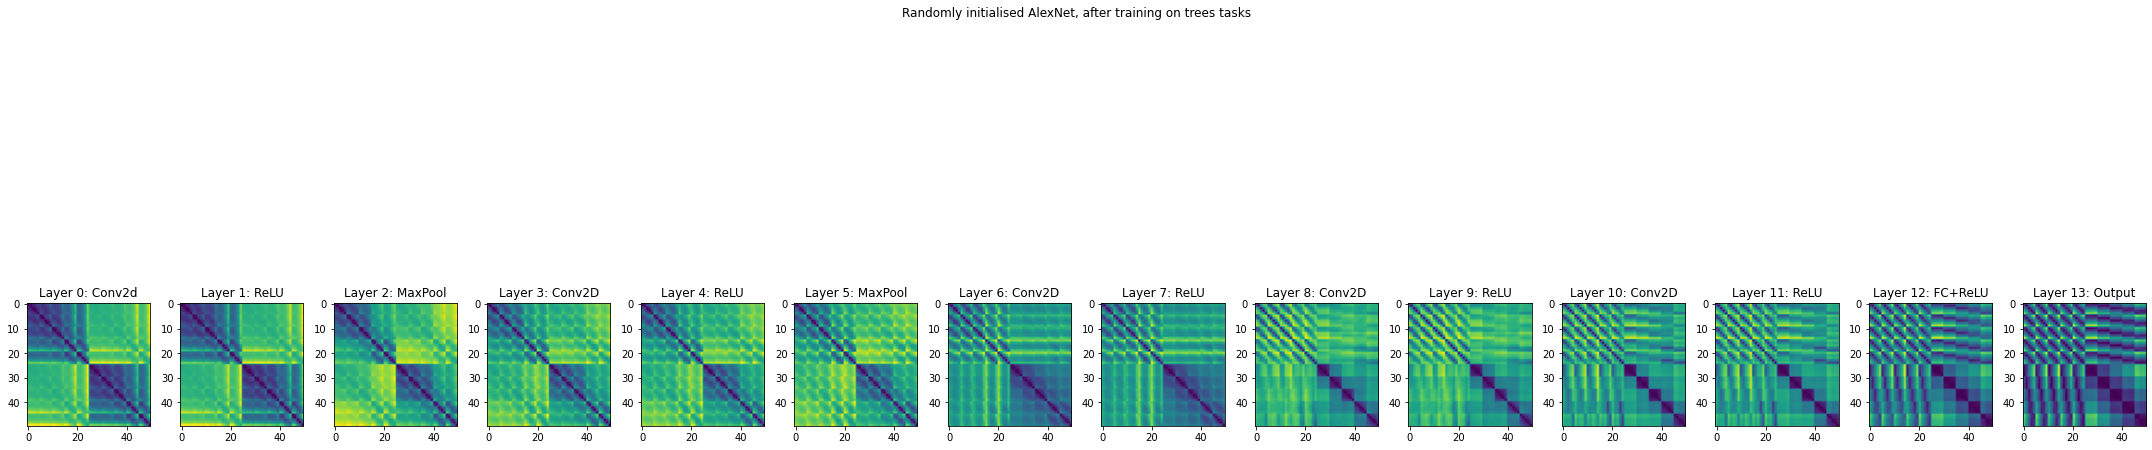

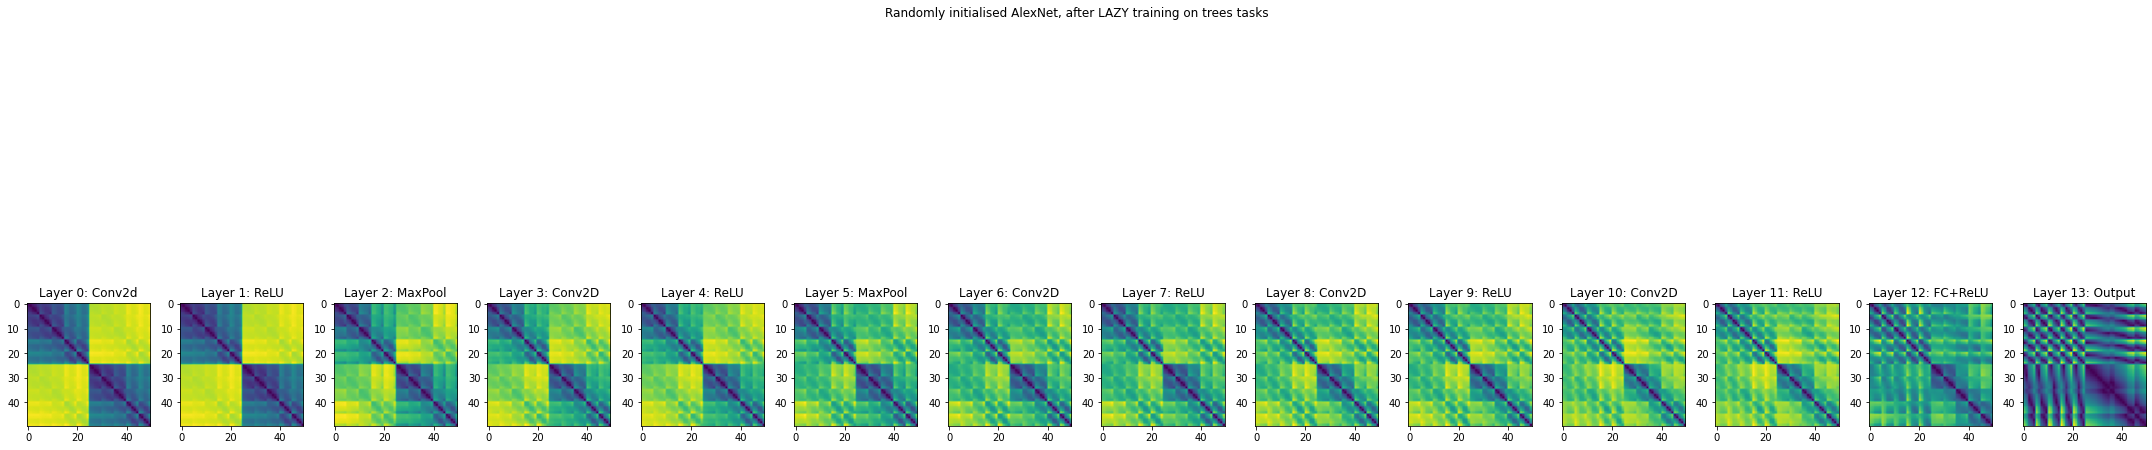

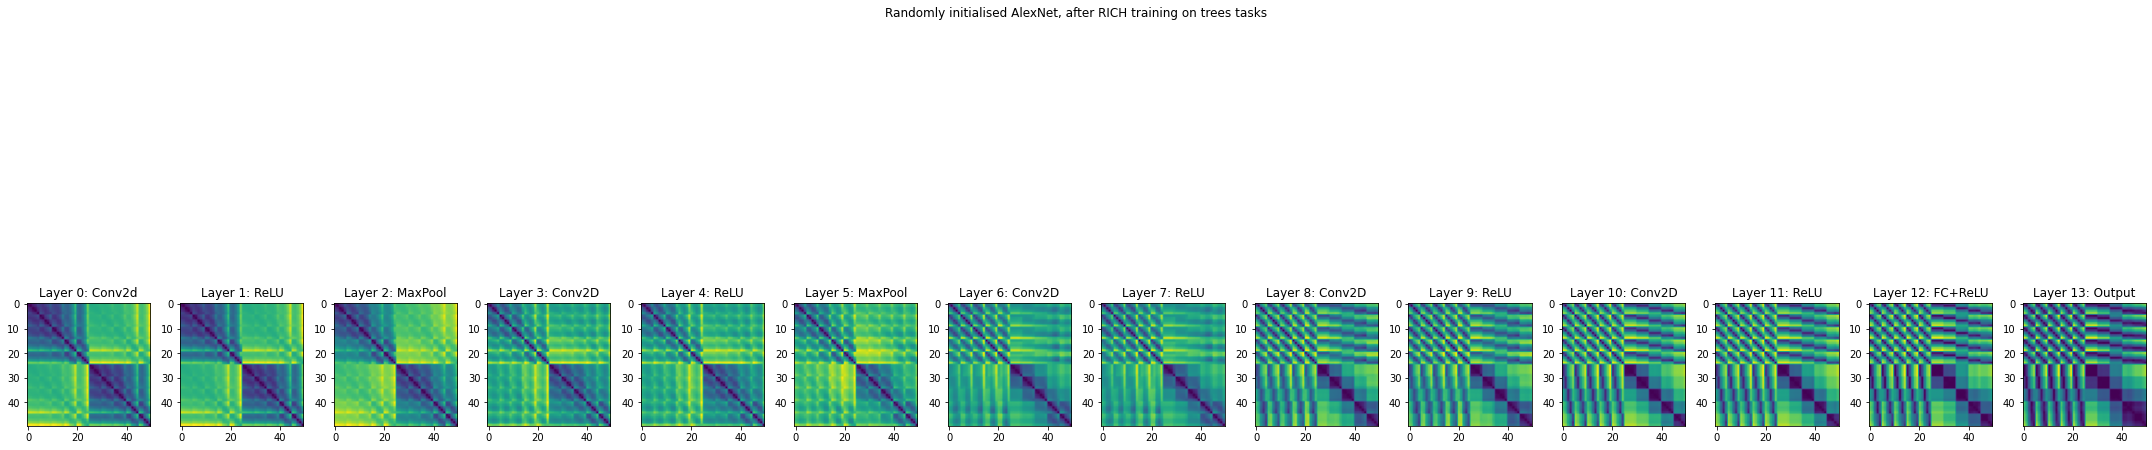

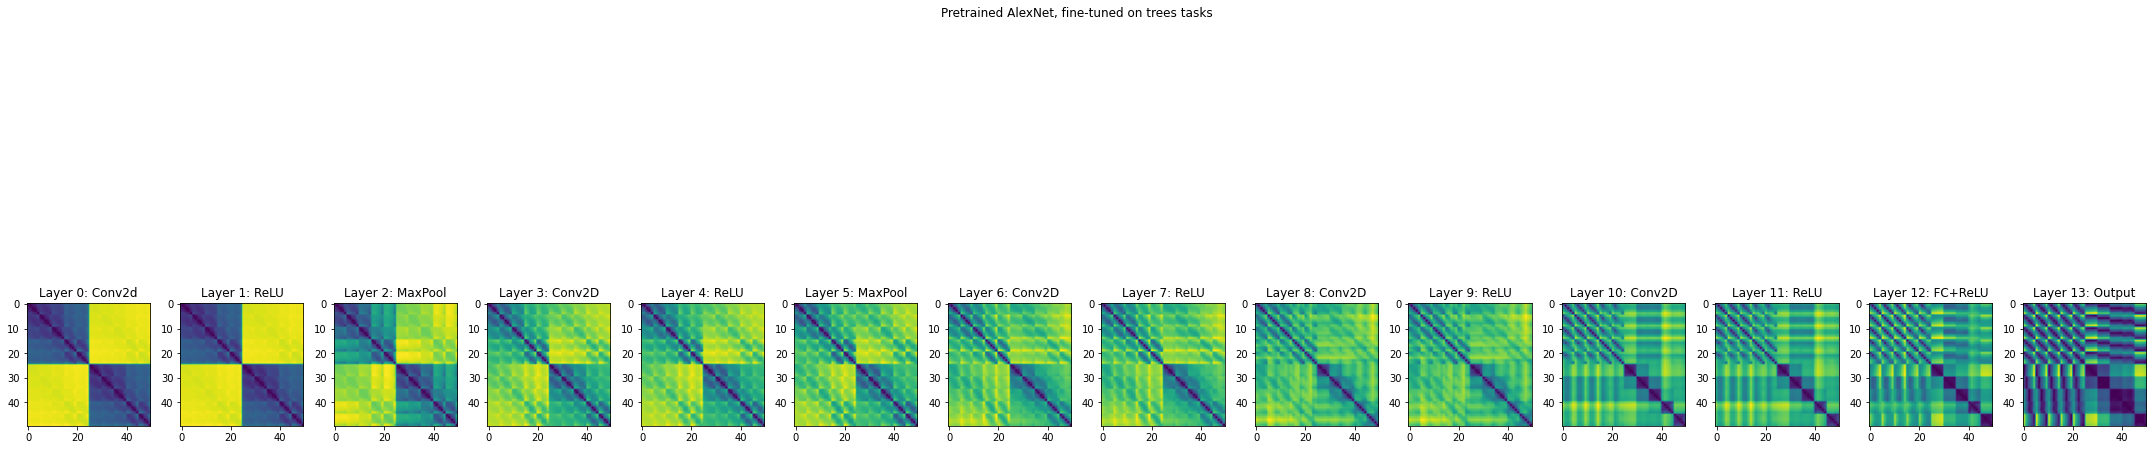

In [8]:
# visualise RDMs
layer_labels = ['Layer '+str(i)+': ' +l for i,l in enumerate(['Conv2d','ReLU','MaxPool','Conv2D','ReLU','MaxPool','Conv2D','ReLU','Conv2D','ReLU','Conv2D','ReLU','FC+ReLU','Output'])]
# # Fromscratch, not trained on task
# model = CustomAlexNet(pretrained=False)
# parser = argparse.ArgumentParser(description='CNN Simulations')
# args = parser.parse_args(args=[])
# args.device='cuda'
# outputs,rdms = perform_rsa_cnn(args,model)
# f,axs = plt.subplots(1,len(layers),figsize=(30,10))
# for l,ax,rdm in zip(layer_labels,axs,rdms):
#     ax.imshow(rdm[:,:])
#     ax.set_title(l)

# plt.suptitle('Randomly initialised AlexNet, before training on trees tasks')
# plt.tight_layout()


# Fromscratch, trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch/'+'results.pkl','rb') as f:
    results = pickle.load(f)
rdms = results['rdms']

f,axs = plt.subplots(1,len(layers),figsize=(30,10))
for l,ax,rdm in zip(layer_labels,axs,rdms):
    ax.imshow(rdm[:,:])
    ax.set_title(l)

plt.suptitle('Randomly initialised AlexNet, after training on trees tasks')
plt.tight_layout()

# Fromscratch, lazy trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch_lazy/run_1/'+'results.pkl','rb') as f:
    results = pickle.load(f)
rdms = results['rdms']

f,axs = plt.subplots(1,len(layers),figsize=(30,10))
for l,ax,rdm in zip(layer_labels,axs,rdms):
    ax.imshow(rdm[:,:])
    ax.set_title(l)

plt.suptitle('Randomly initialised AlexNet, after LAZY training on trees tasks')
plt.tight_layout()


# Fromscratch, rich trained on task 
with open('../../Data/Simulations/cnn/alexnet_fromscratch_rich/run_1/'+'results.pkl','rb') as f:
    results = pickle.load(f)
rdms = results['rdms']

f,axs = plt.subplots(1,len(layers),figsize=(30,10))
for l,ax,rdm in zip(layer_labels,axs,rdms):
    ax.imshow(rdm[:,:])
    ax.set_title(l)

plt.suptitle('Randomly initialised AlexNet, after RICH training on trees tasks')
plt.tight_layout()

# # Pretrained, not trained on task
# model = CustomAlexNet(pretrained=True)
# parser = argparse.ArgumentParser(description='CNN Simulations')
# args = parser.parse_args(args=[])
# args.device='cuda'
# outputs,rdms = perform_rsa_cnn(args,model)
# f,axs = plt.subplots(1,len(layers),figsize=(30,10))
# for l,ax,rdm in zip(layer_labels,axs,rdms):
#     ax.imshow(rdm[:,:])
#     ax.set_title(l)

# plt.suptitle('Pretrained AlexNet, before training on trees tasks')
# plt.tight_layout()


# Pretrained, fine-tuned on task
with open('../../Data/Simulations/cnn/alexnet_pretrained/'+'results.pkl','rb') as f:
    results = pickle.load(f)

rdms = results['rdms']
f,axs = plt.subplots(1,len(layers),figsize=(30,10))
for l,ax,rdm in zip(layer_labels,axs,rdms):
    ax.imshow(rdm[:,:])
    ax.set_title(l)

plt.suptitle('Pretrained AlexNet, fine-tuned on trees tasks')
plt.tight_layout()





## perform model RSA

In [3]:
# model RSA

from scipy.stats import zscore 
from sklearn.linear_model import LinearRegression

def gen_modelrdms(ctx_offset=5):
    models = []
    ctx = np.concatenate((ctx_offset*np.ones((25,1)),np.zeros((25,1))),axis=0).reshape(50,1)
    ## model rdms:
    a,b = np.meshgrid(np.linspace(-2,2,5),np.linspace(-2,2,5))
    # grid model
    gridm = np.concatenate((a.flatten()[np.newaxis,:],b.flatten()[np.newaxis,:]),axis=0).T
    gridm = np.concatenate((np.tile(gridm,(2,1)),ctx),axis=1)
    models.append(squareform(pdist(gridm,metric='euclidean')))

    # # rotated grid model 
    # gridm = np.concatenate((a.flatten()[np.newaxis,:],b.flatten()[np.newaxis,:]),axis=0).T
    # gridm[25:, :] = gridm[25:, :] @ np.array([[np.cos(np.deg2rad(270)), -np.sin(np.deg2rad(270))], [np.sin(np.deg2rad(270)), np.cos(np.deg2rad(270))]])
    # gridm = np.concatenate((np.tile(gridm,(2,1)),ctx),axis=1)
    # models.append(squareform(pdist(gridm,metric='euclidean')))

    # orthogonal model
    orthm = np.concatenate((np.concatenate((a.flatten()[np.newaxis,:],np.zeros((1,25))),axis=0).T,
                            np.concatenate((np.zeros((1,25)),b.flatten()[np.newaxis,:]),axis=0).T),axis=0)
    orthm = np.concatenate((orthm,ctx),axis=1)
    models.append(squareform(pdist(orthm,metric='euclidean')))


    # parallel model 
    a = a.flatten()
    b = b.flatten()

    ta = np.stack((a,np.zeros((25))),axis=1)
    tb = np.stack((np.zeros(25),b),axis=1)
    theta = np.radians(-90)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))

    parm = np.concatenate((ta.dot(R),tb),axis=0)
    parm = np.concatenate((parm,ctx),axis=1)
    models.append(squareform(pdist(parm,metric='euclidean')))

    # # only branchiness model
    # obm = np.concatenate((a[:,np.newaxis],a[:,np.newaxis]),axis=0)

    # models.append(squareform(pdist(obm,metric='euclidean')))

    # # only leafiness model
    # olm = np.concatenate((b[:,np.newaxis],b[:,np.newaxis]),axis=0)
    # models.append(squareform(pdist(olm,metric='euclidean')))

    # # diagonal model
    # ta = np.stack((a,b),axis=1)
    # tb = np.stack((a,b),axis=1)
    # theta = np.radians(45)
    # c, s = np.cos(theta), np.sin(theta)
    # R = np.array(((c, -s), (s, c)))

    # diagm = np.concatenate((ta.dot(R),tb.dot(R)),axis=0)
    # diagm = np.concatenate((diagm,ctx),axis=1)
    # models.append(squareform(pdist(diagm,metric='euclidean')))


 
    # construct design matrix
    dmat = np.asarray([zscore(rdm[np.tril_indices(50,k=-1)].flatten()) for rdm in models]).T
    
    rdms = np.asarray(models)  

    return rdms,dmat


    

In [7]:
# ditto but only each module (i.e. behind relu)
layerstoplot = [2,5,7,9,11,12]
layer_labels = ['Conv 1','Conv 2','Conv 3','Conv 4','Conv 5','FC']
# visualise Modelfits
%matplotlib qt
# layer_labels = ['Layer '+str(i)+': ' +l for i,l in enumerate(['Conv 1','Conv 2','Conv 3','Conv 4','Conv 5','FC','Output'])]

mm = 1/25.4

# Fromscratch, trained on task 
cs = []
for r in range(30):
    cr = []
    with open('../../Data/Simulations/cnn/alexnet_fromscratch/run_'+ str(r) + '/'+'results.pkl','rb') as f:
        results = pickle.load(f)
    rdms = np.asarray(results['rdms'])
    rdms = rdms[layerstoplot,:,:]
    # loop over layers and perform rsa:
    for l,rdm in enumerate(rdms):
        regr = LinearRegression()
        _,dmat = gen_modelrdms(ctx_offset=1.8)
        
        y  = zscore(rdm[np.tril_indices(50,k=-1)])
        regr.fit(dmat,y)
        cr.append(np.asarray(regr.coef_))
    cs.append(cr)
cs = np.asarray(cs)

f,ax = plt.subplots(1,1,figsize=(85*mm,80*mm),dpi=300)
for i,l in zip(np.arange(len(layer_labels)),layer_labels):
    c = cs[:,i,:]    
    b1 = ax.bar(i-0.2,c[:,0].mean(0),yerr=np.std(c[:,0],0)/np.sqrt(30),color=(39/255, 140/255, 145/255),width=0.2)
    ax.scatter(np.repeat(i,30)-0.2+np.random.randn(30)*0.01,c[:,0],color=(0,0,0),alpha=0.4,zorder=3,s=5,edgecolors='k',linewidth=0.5)
    b2 = ax.bar(i,c[:,1].mean(0),yerr=np.std(c[:,1],0)/np.sqrt(30),color=(34/255, 76/255, 128/255),width=0.2)
    ax.scatter(np.repeat(i,30)+np.random.randn(30)*0.01,c[:,1],color=(0,0,0),alpha=0.4,zorder=3,s=5,edgecolors='k',linewidth=0.5)
    b3 = ax.bar(i+0.2,c[:,2].mean(0),yerr=np.std(c[:,2],0)/np.sqrt(30),color=(159/255, 45/255, 235/255),width=0.2)    
    ax.scatter(np.repeat(i,30)+0.2+np.random.randn(30)*0.01,c[:,2],color=(0,0,0),alpha=0.4,zorder=3,s=5,edgecolors='k',linewidth=0.5)

    # _= ax.set(xticks=np.arange(3),xticklabels=['grid','orthogonal','parallel'],ylim=[-1,1.5])
    # ax.set_aspect('equal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
_ = ax.set_xticks(ticks=range(len(layer_labels)))
_ = ax.set_xticklabels(labels=layer_labels,rotation=90)
ax.set_ylim((-0.5,1.5))
ax.set_xlabel('Layer')
ax.set_ylabel(r'$\beta$ estimate (a.u.)')
plt.legend((b1,b2,b3),['grid model','orthogonal model','parallel model'],frameon=False)
plt.title('Rich-initialised CNN')

# fromscratch, lazy
cs = []
for r in range(30):
    cr = []
    with open('../../Data/Simulations/cnn/alexnet_fromscratch_lazy/run_'+ str(r) + '/'+'results.pkl','rb') as f:
        results = pickle.load(f)
    rdms = np.asarray(results['rdms'])
    rdms = rdms[layerstoplot,:,:]
    # loop over layers and perform rsa:
    for l,rdm in enumerate(rdms):
        regr = LinearRegression()
        _,dmat = gen_modelrdms(ctx_offset=3)
        
        y  = zscore(rdm[np.tril_indices(50,k=-1)])
        regr.fit(dmat,y)
        cr.append(np.asarray(regr.coef_))
    cs.append(cr)
cs = np.asarray(cs)
cs.shape

f,ax = plt.subplots(1,1,figsize=(85*mm,80*mm),dpi=300)
for i,l in zip(np.arange(len(layer_labels)),layer_labels):
    c = cs[:,i,:]    
    b1 = ax.bar(i-0.2,c[:,0].mean(0),yerr=np.std(c[:,0],0)/np.sqrt(30),color=(39/255, 140/255, 145/255),width=0.2)
    ax.scatter(np.repeat(i,30)-0.2+np.random.randn(30)*0.01,c[:,0],color=(0,0,0),alpha=0.4,zorder=3,s=5,edgecolors='k',linewidth=0.5)
    b2 = ax.bar(i,c[:,1].mean(0),yerr=np.std(c[:,1],0)/np.sqrt(30),color=(34/255, 76/255, 128/255),width=0.2)
    ax.scatter(np.repeat(i,30)+np.random.randn(30)*0.01,c[:,1],color=(0,0,0),alpha=0.4,zorder=3,s=5,edgecolors='k',linewidth=0.5)
    b3 = ax.bar(i+0.2,c[:,2].mean(0),yerr=np.std(c[:,2],0)/np.sqrt(30),color=(159/255, 45/255, 235/255),width=0.2)    
    ax.scatter(np.repeat(i,30)+0.2+np.random.randn(30)*0.01,c[:,2],color=(0,0,0),alpha=0.4,zorder=3,s=5,edgecolors='k',linewidth=0.5)

    # _= ax.set(xticks=np.arange(3),xticklabels=['grid','orthogonal','parallel'],ylim=[-1,1.5])
    # ax.set_aspect('equal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
_ = ax.set_xticks(ticks=range(len(layer_labels)))
_ = ax.set_xticklabels(labels=layer_labels,rotation=90)
ax.set_ylim((-0.5,1.5))
ax.set_xlabel('Layer')
ax.set_ylabel(r'$\beta$ estimate (a.u.)')
plt.legend((b1,b2,b3),['grid model','orthogonal model','parallel model'],frameon=False)
plt.title('Lazy-initialised CNN')



Text(0.5, 1.0, 'Lazy-initialised CNN')

## Parameterised Model
estimate parameters of more flexible model RDM for each layer of network

In [6]:
def objective_function(theta, y_true):
    return np.sum((y_true-param_rdm_model(theta))**2) 



def param_rdm_model(theta):
    '''
    generates model rdm from free parameters for 
    compression (rel & irrel dimensions), offset & rotation
    '''
    # unpack parameters 
    c_rel_north,c_rel_south,c_irrel_north,c_irrel_south,a2,ctx = theta
    a1 = 0
    # note: north=90 and south =0 optim
    l,b = np.meshgrid(np.linspace(-2,2,5),np.linspace(-2,2,5))
    b = b.ravel()
    l = l.ravel()
    response_vect = np.concatenate((np.array([(1-c_irrel_north)*b,(1-c_rel_north)*l]),np.array([(1-c_rel_south)*b,(1-c_irrel_south)*l])),axis=1).T

    R1 = np.array([[np.cos(np.deg2rad(a1)),-np.sin(np.deg2rad(a1))],[np.sin(np.deg2rad(a1)),np.cos(np.deg2rad(a1))]])
    R2 = np.array([[np.cos(np.deg2rad(a2)),-np.sin(np.deg2rad(a2))],[np.sin(np.deg2rad(a2)),np.cos(np.deg2rad(a2))]])

    response_vect[:25,:] = response_vect[:25,:] @ R1 
    response_vect[25:,:] = response_vect[25:,:] @ R2 
    ctx_vect = np.zeros((50,1))
    ctx_vect[25:] += ctx
    response_vect = np.concatenate((response_vect,ctx_vect),axis=1)
    rdm = squareform(pdist(response_vect))

    
    # vectorise and scale rdm 
    rvect = rdm[np.triu_indices(50,k=1)].flatten()
    rvect /= np.max(rvect)
    return rvect


def fit_param_rdm_model(y_rdm,theta_init=[0.0,0.0,0.0,0.0,-20.0,0.0],ctx_bounds=(0,2),comp_bounds=(0.0,1.0),phi_bounds=(-90,90)):
    '''
    fits choice model to data, using  L-BFGS-B algorithm
    '''
    y_true = y_rdm[np.triu_indices(50,k=1)].flatten()
    y_true /= np.max(y_true)

    theta_bounds = (comp_bounds,comp_bounds,comp_bounds,comp_bounds,phi_bounds,ctx_bounds)    
    
    results = minimize(fun=objective_function,args=y_true,x0=theta_init,bounds=theta_bounds,method='L-BFGS-B')

    return results.x


def fit_model_randinit(y_true):
        # set starting values:
        theta_init = [
            np.random.uniform(0,1),
            np.random.uniform(0,1),
            np.random.uniform(0,1), 
            np.random.uniform(0,1), 
            np.random.choice(np.arange(-90,91,1)),
            np.random.uniform(0,2)
        ]
        
        # fit model:
        thetas = fit_param_rdm_model(y_true,theta_init=theta_init)
        return thetas 

def wrapper_fit_param_model(y_true,n_iters=100,para_iters=False):    
    if para_iters:
        thetas = Parallel(n_jobs=6,backend='loky',verbose=0)(delayed(fit_model_randinit)(y_true) for i in range(n_iters))
    else:
        thetas = [fit_model_randinit(y_true) for i in range(n_iters)]
    thetas = np.array(thetas)
    
    return thetas.mean(0)


class Timer(object):
    def __init__(self, name=None):
        self.name = name

    def __enter__(self):
        self.tstart = time.time()

    def __exit__(self, type, value, traceback):
        if self.name:
            print('[%s]' % self.name,)
        print('Elapsed: %s' % (time.time() - self.tstart))





In [7]:
layerstoplot = [2,5,7,9,11,12,13]
# # from scratch:
# thetas = np.empty((len(layerstoplot),30,6))
# rdms = np.empty((len(layerstoplot),30,50,50))

# for r in range(30):
#     with open('../../Data/Simulations/cnn/alexnet_fromscratch/run_' + str(r) + '/'+'results.pkl','rb') as f:
#         results = pickle.load(f)
#     gtrdms = np.asarray(results['rdms'])[layerstoplot]
#     for l,rdm in enumerate(gtrdms): 
#         t =  wrapper_fit_param_model(rdm,n_iters=100,para_iters=True)
#         thetas[l,r,:] = t
#         rdms[l,r,:,:] = squareform(param_rdm_model(t))   
   
# parammod_results = {'thetas':thetas,'rdms':rdms}
# with open('parammod_alexnet_fromscratch.pkl','wb') as f:
#     pickle.dump(parammod_results,f)

# # pretrained:
# thetas = np.empty((len(layerstoplot),30,6))
# rdms = np.empty((len(layerstoplot),30,50,50))

# for r in range(30):
#     with open('../../Data/Simulations/cnn/alexnet_pretrained/run_' + str(r) + '/'+'results.pkl','rb') as f:
#         results = pickle.load(f)
#     gtrdms = np.asarray(results['rdms'])[layerstoplot]
#     for l,rdm in enumerate(gtrdms): 
#         t =  wrapper_fit_param_model(rdm,n_iters=100,para_iters=True)
#         thetas[l,r,:] = t
#         rdms[l,r,:,:] = squareform(param_rdm_model(t))   
   
# parammod_results = {'thetas':thetas,'rdms':rdms}
# with open('parammod_alexnet_pretrained.pkl','wb') as f:
#     pickle.dump(parammod_results,f)



# # from scratch, rich learning:
# thetas = np.empty((len(layerstoplot),30,6))
# rdms = np.empty((len(layerstoplot),30,50,50))

# for r in range(30):
#     with open('../../Data/Simulations/cnn/alexnet_fromscratch_rich/run_' + str(r) + '/'+'results.pkl','rb') as f:
#         results = pickle.load(f)
#     gtrdms = np.asarray(results['rdms'])[layerstoplot]
#     for l,rdm in enumerate(gtrdms): 
#         t =  wrapper_fit_param_model(rdm,n_iters=100,para_iters=True)
#         thetas[l,r,:] = t
#         rdms[l,r,:,:] = squareform(param_rdm_model(t))   
   
# parammod_results = {'thetas':thetas,'rdms':rdms}
# with open('parammod_alexnet_fromscratch_rich.pkl','wb') as f:
#     pickle.dump(parammod_results,f)    


# from scratch, lazy learning:
# thetas = np.empty((len(layerstoplot),30,6))
# rdms = np.empty((len(layerstoplot),30,50,50))

# for r in range(30):
#     with open('../../Data/Simulations/cnn/alexnet_fromscratch_lazy/run_' + str(r) + '/'+'results.pkl','rb') as f:
#         results = pickle.load(f)
#     gtrdms = np.asarray(results['rdms'])[layerstoplot]
#     for l,rdm in enumerate(gtrdms): 
#         t =  wrapper_fit_param_model(rdm,n_iters=100,para_iters=True)
#         thetas[l,r,:] = t
#         rdms[l,r,:,:] = squareform(param_rdm_model(t))   
   
# parammod_results = {'thetas':thetas,'rdms':rdms}
# with open('parammod_alexnet_fromscratch_lazy.pkl','wb') as f:
#     pickle.dump(parammod_results,f)    



In [10]:
def spiceUp_figure(fh,xlabels):
    plt.figure(fh.number)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)    
    plt.xticks(ticks=np.arange(len(xlabels)),labels=xlabels,rotation=90)


with open('parammod_alexnet_fromscratch_lazy.pkl','rb') as f:
    data = pickle.load(f)


mm = 1/25.4
f1 = plt.figure(1,figsize=(55*mm,50*mm), dpi=300)
f2 = plt.figure(2,figsize=(55*mm,50*mm), dpi=300)
f3 = plt.figure(3,figsize=(55*mm,50*mm), dpi=300)
f4 = plt.figure(4,figsize=(55*mm,50*mm), dpi=300)
layer_labels = ['Conv 1','Conv 2','Conv 3','Conv 4','Conv 5','FC']

for ii in range(len(layer_labels)):

    data_layer = np.array(data['thetas'])[ii,:,:]

    # plot relative compression
    plt.figure(f1.number)
    # north & south task task
    comp_north = np.log(data_layer[:,0]/data_layer[:,2])
    comp_south = np.log(data_layer[:,1]/data_layer[:,3])
    bn = plt.bar(ii-0.1,np.mean(comp_north),yerr=np.std(comp_north)/(len(comp_north)**.5),width=0.3,linewidth=2,color=(0,0,.5),zorder=1)
    bs = plt.bar(ii+0.2,np.mean(comp_south),yerr=np.std(comp_south)/(len(comp_south)**.5),width=0.3,linewidth=2,color=(255/255,102/255,0),zorder=1)
    plt.scatter(np.repeat((ii-0.1),len(comp_north))+np.random.randn(len(comp_north))*0.01,comp_north,s=4,color=(0,0,.5),alpha=.4,zorder=3,edgecolors='k',linewidth=0.5)
    plt.scatter(np.repeat((ii+0.2),len(comp_south))+np.random.randn(len(comp_north))*0.01,comp_south,s=4,color=(255/255,102/255,0),alpha=.4,zorder=3,edgecolors='k',linewidth=0.5)
    spiceUp_figure(f1,layer_labels)
    plt.ylabel(r'$\mathrm{log(\frac{compression_{relevant}}{compression_{irrelevant}})}$',fontsize=7)
    # plt.title('Estimated Compression \n Relevant vs Irrelevant Dimension',fontsize=6)
    plt.legend([bn,bs],['North Task','South Task'],frameon=False,loc=1,fontsize=6)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

    
    # plot estimated angle (abs)
    plt.figure(f2.number)
    phi_est = np.abs(data_layer[:,4])
    bph = plt.bar(ii,np.mean(phi_est),yerr=np.std(phi_est)/(len(phi_est)**.5),width=0.3,color=(0.7,0.7,.7),zorder=1)
    plt.scatter(np.repeat(ii,len(phi_est))+np.random.randn(len(comp_north))*0.01,phi_est,color=(0.7,0.7,.7),alpha=0.4,zorder=3,s=4,edgecolors='k',linewidth=0.5)
    spiceUp_figure(f2,layer_labels)
    plt.ylabel('abs(rotation) (°)',fontsize=6)
    # plt.title('Estimated Rotation \n from Stimulus to Response Space',fontsize=6)
    plt.xticks(fontsize=6)
    plt.yticks(ticks=[0,30,60,90],fontsize=6)
    plt.ylim([0,90])

    # estimated ctx offset 
    plt.figure(f3.number)
    ctx_est = data_layer[:,5]
    bctx = plt.bar(ii,np.mean(ctx_est),yerr=np.std(ctx_est)/(len(ctx_est)**.5),width=0.6,color=(0.7,0.7,.7))
    plt.scatter(np.repeat(ii,len(ctx_est))+np.random.randn(len(comp_north))*0.01,ctx_est,color=(0.7,0.7,.7),alpha=0.4,zorder=3,s=4,edgecolors='k',linewidth=0.5)
    spiceUp_figure(f3,layer_labels)
    plt.ylabel('ctx offset (a.u.)',fontsize=6)
    # plt.title('Estimated Context Offset Parameter',fontsize=6)
    plt.ylim([0,2])
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

    # plot estimated angle 
    plt.figure(f4.number)
    phi_est = data_layer[:,4]*(-1)
    bph = plt.bar(ii,np.mean(phi_est),yerr=np.std(phi_est)/(len(phi_est)**.5),width=0.6,color=(0.7,0.7,.7),zorder=1)
    plt.scatter(np.repeat(ii,len(phi_est))+np.random.randn(len(comp_north))*0.01,phi_est,color=(0.7,0.7,.7),alpha=0.4,zorder=3,s=4,edgecolors='k',linewidth=0.5)
    spiceUp_figure(f4,layer_labels)
    plt.ylabel('rotation (°)',fontsize=6)
    # plt.title('Estimated Rotation \n from Stimulus to Response Space',fontsize=6)
    plt.xticks(fontsize=6)
    plt.yticks(ticks=[-90,-60,-30,0,30,60,90],fontsize=6)
    plt.ylim([-90,90])


plt.figure(f1.number)
plt.yticks(np.arange(-3,3.1,1)) 
plt.ylim([-3,3])
lims = plt.xlim()
plt.plot(lims,[0,0],'k-',linewidth=.5)
plt.tight_layout()
plt.figure(f2.number)
plt.ylim([0,90])
lims = plt.xlim()
plt.plot(lims,[0,0],'k-',linewidth=.5)
plt.tight_layout()
plt.figure(f3.number)
plt.tight_layout()
f = plt.gcf()
f.set_dpi(300)

## MDS on activation patterns

In [12]:
import math
# helper functions
def rotate_axes(x,y,theta):
    # theta is in degrees
    theta_rad = theta * (math.pi/180)  # convert to radians
    x_new = x * math.cos(theta_rad) + y * math.sin(theta_rad)
    y_new =  -x * math.sin(theta_rad) + y * math.cos(theta_rad)
    return x_new, y_new

def rotate(X, theta, axis='x'):
    '''Rotate multidimensional array `X` `theta` degrees around axis `axis`'''
    theta = theta * (math.pi/180)  # convert to radians
    c, s = np.cos(theta), np.sin(theta)
    if axis == 'x': return np.dot(X, np.array([
        [1.,  0,  0],
        [0 ,  c, -s],
        [0 ,  s,  c]
        ]))
    elif axis == 'y': return np.dot(X, np.array([
        [c,  0,  -s],
        [0,  1,   0],
        [s,  0,   c]
        ]))
    elif axis == 'z': return np.dot(X, np.array([
        [c, -s,  0 ],
        [s,  c,  0 ],
        [0,  0,  1.],
        ]))


In [13]:
n_runs = 30
layerstoplot = [2,5,7,9,11,12,13]

rdms = np.empty((len(layerstoplot),n_runs,50,50))

for r in range(n_runs):
    with open('../../Data/Simulations/cnn/alexnet_fromscratch_lazy/run_' + str(r) + '/'+'results.pkl','rb') as f:
        results = pickle.load(f)
    rdms[:,r,:,:] = np.asarray(results['rdms'])[layerstoplot]
rdms = rdms.mean(1)

# iterate over layers and perform mds 
mds = MDS(n_components=3,max_iter=1000,dissimilarity='precomputed')
xyz = np.empty((len(layerstoplot),50,3))
for i,rdm in enumerate(rdms):
    xyz[i,:,:] = mds.fit_transform(rdm)


In [ ]:
# todo: rotate each projection so that it's axis-aligned 
theta_x = 180
theta_y = 280
theta_z = 10+90

xyz_rot = rotate(embeddings['rich'],theta_x,axis='x')
xyz_rot = rotate(xyz_rot,theta_y,axis='y')
xyz_rot = rotate(xyz_rot,theta_z,axis='z')

In [14]:
%matplotlib qt
layer_labels = ['Conv 1','Conv 2','Conv 3','Conv 4','Conv 5','FC']
for l,label in enumerate(layer_labels):
    fig = plt.figure(l+1,dpi=400,facecolor='w',edgecolor='k')
    xyz[l,:,:] = xyz[l,:,:]/np.max(xyz[l,:,:])
    plot_MDS_embeddings_2D(xyz[l,:,:],fig,fig_id=l+1,axlims=2)
    plt.suptitle(label)
